**Prediction of Credit Card fraud transactions**

In [ ]:
# Libraries required for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Upgrad/Capstone Project/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# To protect the user's identity and the security of their confidential nformation, the dataset provider has applied Principal Component Analysis transformation on the original numerical features and compressed it into 28 principals components.

# Only two features have not been transformed -> 1) Time and 2) Amount

# The feature "Class" will be target column with user labels as:
# 0 : non-fradulent
# 1 : fraudulent

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Check for null values in our data
df.isnull().sum()
# Since we do not have any null values in our data, we do not need to handle null values in this instance.

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**EDA - Exploratory Data Exploration**

In [ ]:
Class = df['Class'].value_counts()
Class
# 0 = Non Fraudulent & 1 = Fraudulent

,count
Class,
0,284315
1,492


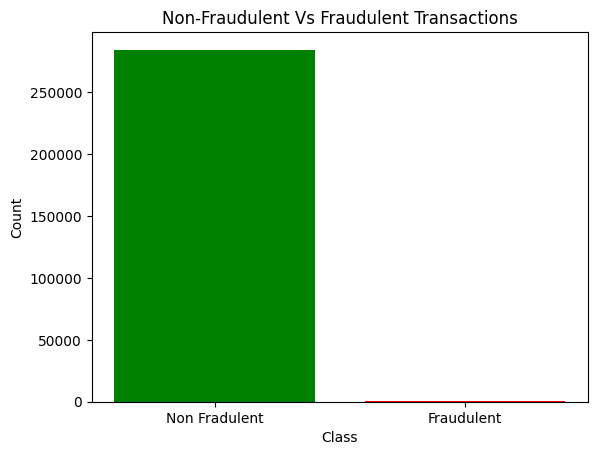

In [ ]:
labels = ['Non Fradulent','Fraudulent']
plt.bar(labels, Class.values, color=['Green','Red'])
plt.title("Non-Fraudulent Vs Fraudulent Transactions")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The barplot reveals a significant imbalance between classes 0 & 1.
(0 = Non Fradulent) and (1 = Fraudulent)

Since almost all features in provided dataset are in PCA form (Principal Component Analysis) except two features "Time" and "Amount", we will explore these fields and see their importance in our dataset.

In [ ]:
df['Time'].describe()

,Time
count,284807.000000
mean,94813.859575
std,47488.145955
min,0.000000
25%,54201.500000
50%,84692.000000
75%,139320.500000
max,172792.000000


In [ ]:
df['Amount'].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


We will use visualization of transaction counts across the day, to get more understanding for
Subsequently, we will partition the dataset into fraudulent and non-fradulent transactions to gain a more detailed perspective.

In [ ]:
non_fraud = len(df[df.Class==0])
fraud = len(df[df.Class==1])
fraud_percentage = round((fraud/ (fraud+ non_fraud)) * 100, 2)
# Calculating fraud transactions percentage

In [ ]:
print("Number of Non-Fraudulent Transactions: ",non_fraud)
print("Number of Fraudulent Transactions: ", fraud)
print("Percentage of Fraudulent Transactions: ",fraud_percentage)
# From the counts of Fraudulent and Non Fraudulent Transactions in the dataset we can see that we have a class imbalance.

Number of Non-Fraudulent Transactions:  284315
Number of Fraudulent Transactions:  492
Percentage of Fraudulent Transactions:  0.17



1.   Since the Amount field is not scaled for the transactions, we will scale Amount to get more accurate predictions, and ensure the model does not get biased towards larger values.
2.   We can also conclude that Time is not much relevant to our dataset, so we will go ahead and drop this field.




In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [ ]:
df.drop(columns=['Amount','Time'], inplace=True ,axis=1)
# Since we have the Scaled_Amount field added to the dataset with scaled amounts, we will drop original Amount field, along with the Time field.

In [ ]:
Y = df['Class']
# Assigned target column to a variable Y
X = df.drop(['Class'], axis=1)
# Dropeed Class field from dataset

Now, we will split the credit card data with a split of 70-30 using train_test_split().
train_test_split() function in scikit-learn is a useful utility for splitting a dataset into training and testing sets.

Parameters

X: Feature matrix

Y: Target variable

Test_size: Proportion of the dataset to include in the test split.
Here we have set the test_size as 0.3 means 30% of the data we take as a testing data set.

Random_state: We have set the seed for random number generation, to ensure the reproducibility.


In [ ]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X,Y, test_size=0.3, random_state=50)

In [ ]:
print("Shape of the training dataset train_X: ", train_X.shape)
print("Shape of the testing dataset test_X: ", test_X.shape)

Shape of the training dataset train_X:  (199364, 29)
Shape of the testing dataset test_X:  (85443, 29)


**Model Selection**

We will explore various machine learning algorithms to determine the most effective model for our binary classification problem.

The task involves predicting one of the two class labels. We plan to access the performance of different algorithms, such as Random Forest and Decision Tree identify the most suitable solution for our specific problem

Our approach involves constructing Random Forest and Decision Tree classifiers to identify the most effective model.

*   **Decision Tree Algorithm**

The Decision Tree Algorithm is a supervised machine learning technique employed for both classification and regression tasks. Its objective is to create a training model capables of predicting the value of a target class variable.
This is achieved by learning straighforward if-then-else decision rules derived from the patterns present in the training data.



*   **Random Forest Algorithm**




Random Forest is supervised Machine Learning algorithm. It creates a "forest" out of an ensemble of "decision trees", which are normally trained using the "bagging" technique.

The bagging method's basic principal is that combining different learning models improved the outcome.To get a more precise and reliable forecast, random forest creates several decision trees and merges them.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
# Here we are providing the RandomForestClassifier to create 100 trees in the forest. The large number of trees generally leads to better performance, but it may also increase the training time.

In [ ]:
# Decision Tree Classifier
decision_tree.fit(train_X, train_Y)
predictions_data = decision_tree.predict(test_X)

In [ ]:
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

# Printing the score of this classifier
print("Decision Tree Score is: ", decision_tree_score)
# 99.9239

Decision Tree Score is:  99.9204147794436


In [ ]:
# Random Forest
random_forest.fit(train_X, train_Y)
predictions_data_rf = random_forest.predict(test_X)
# Takes almost 5 mins to fit data in  this model

In [ ]:
random_forest_score = random_forest.score(test_X, test_Y) * 100

# Printing the score of the Random Forest Classifiers
print("Random Forest Score is: ", random_forest_score)
# 99.9531

Random Forest Score is:  99.95084442259751


In [ ]:
# Printing the scores of the both classifiers
print("Decision Tree: ", round((decision_tree_score),4))
print("Random Forest: ", round((random_forest_score),4))

Decision Tree:  99.9204
Random Forest:  99.9508


The Random Forest classifier has slightly an edge over the Decision Tree Classifier.

Evaluation Metrics

We will create a function to print the metrics:


*   Accuracy_score
*   Precision_score
*   Confusion_matrix
*   Recall_score
*   F-1 score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [ ]:
print("Evaluation of Decision Tree Model: ")
print("Accuracy:",round(accuracy_score(test_Y,predictions_data),4))
print("Precision:",round(precision_score(test_Y,predictions_data),4))
print("recall_score:",round(recall_score(test_Y,predictions_data),4))
print("F1-Score:",round(f1_score(test_Y,predictions_data),4))

Evaluation of Decision Tree Model: 
Accuracy: 0.9992
Precision: 0.7687
recall_score: 0.7687
F1-Score: 0.7687


In [ ]:
print("Evaluation of Random Forest Model: ")
print("Accuracy:",round(accuracy_score(test_Y,predictions_data_rf),4))
print("Precision:",round(precision_score(test_Y,predictions_data_rf),4))
print("recall_score:",round(recall_score(test_Y,predictions_data_rf),4))
print("F1-Score:",round(f1_score(test_Y,predictions_data_rf),4))

Evaluation of Random Forest Model: 
Accuracy: 0.9995
Precision: 0.9268
recall_score: 0.7755
F1-Score: 0.8444


In [ ]:
# Confusion Matrix for Decision Tree model
confusion_matrix_dt = confusion_matrix(test_Y, predictions_data.round())
print(confusion_matrix_dt)

[[85262    34]
 [   34   113]]


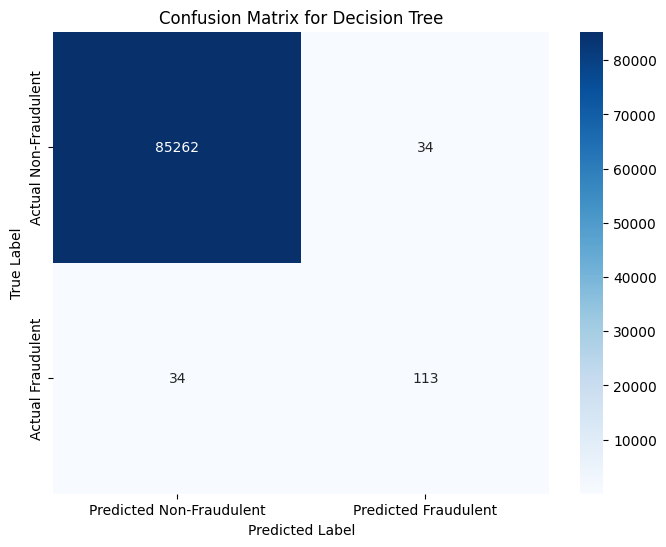

In [ ]:
# Plotting the confusion matrix for better representation
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_dt, annot=True , fmt='d' , cmap="Blues",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Takeaways from this confusion matrix**

***Non-Fraudulent transactions:***

Correctly predicted as non-fraudulent (True Negative) 85266 transactions.

Incorrectly predicted as fraudulent (False Positive) 30 transactions.

***Fraudulent Transactions:***

Incorrectly predicted as non-fraudulent(False Negative) : 35 transactions

Correctly predicted as fraudulent(True Positive) : 112 transactions

# *Conclusions*

The Decision Tree model correctly identified 112 fraudulent transactions.

Incorrectly identified 35 transactions as non-fraudulent.

Correctly identified 85266 non-fraudulent transactions.

Incorrectly identified 30 non-fraudulent transactions as fraudulent.

In [ ]:
# Confusion Matrix for Random Forest model
confusion_matrix_rf = confusion_matrix(test_Y,predictions_data_rf.round())
print(confusion_matrix_rf)

[[85287     9]
 [   33   114]]


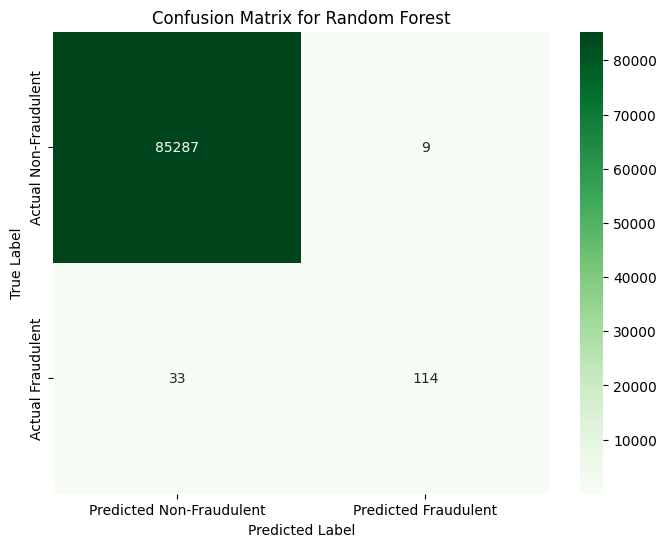

In [ ]:
# we will plot the consfusion matrix
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_rf, annot=True , fmt='d' , cmap="Greens",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Takeaways from this confusion matrix**

*Non-Fraudulent transactions:*

Correctly predicted as non-fraudulent(True Negative) 85288 transactions.

Incorrectly predicted as fraudulent(False Positive) 8 transactions.

*Fraudulent transactions:*

Incorrectly predicted as non-fraudulent(False Negative) : 32 transactions

Correctly predicted as fraudulent(True Positive) : 115 transactions

# *Conclusions*

The Random Forest model correctly identified 115 fraudulent transactions.

Incorrectly identified 32 transactions as non-fraudulent.

Correctly identified 85288 non-fraudulent transactions.

Incorrectly identified only 8 non-fraudulent transactions as fraudulent.

**Class-Imbalance**

The Random Forest model works better than Decision Trees. In the presence of a class-Imbalance issue, where genuine transactions account for over 99% of the dataset and credit card fraud transactions constitute only 0.17%.

Training the model without addressing the imbalance can lead to biased predictions.

Despite the apparent accuracy, such a model may not effectively capture the nuances of the minority class (fraud transactions) and may not generalize well to real-world situations.

The class imbalance problem can be solved by various techniques, Oversampling is one of them.

In [ ]:
# We will use the SMOT (Synthetic Minority Oversampling Technique)
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X,Y)
print("Resampled shape of X: ",X_resampled.shape)
print("Resampled shape of Y: ",Y_resampled.shape)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)


In [ ]:
from collections import Counter
value_counts = Counter(Y_resampled)
print(value_counts)

Counter({0: 284315, 1: 284315})


In [ ]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [ ]:
rf_resampled = RandomForestClassifier(n_estimators=100)
rf_resampled.fit(train_X, train_Y)
# Takes almost 8 min for fitting resamled data.

RandomForestClassifier()

In [ ]:
predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [ ]:
print(random_forest_score_resampled)

99.98827591462522


In [ ]:
# Confusion Matrix for resampled data using Random Forest
confusion_matrix_rf_resampled= confusion_matrix(test_Y,predictions_resampled.round())
print(confusion_matrix_rf_resampled)

[[85129    20]
 [    0 85440]]


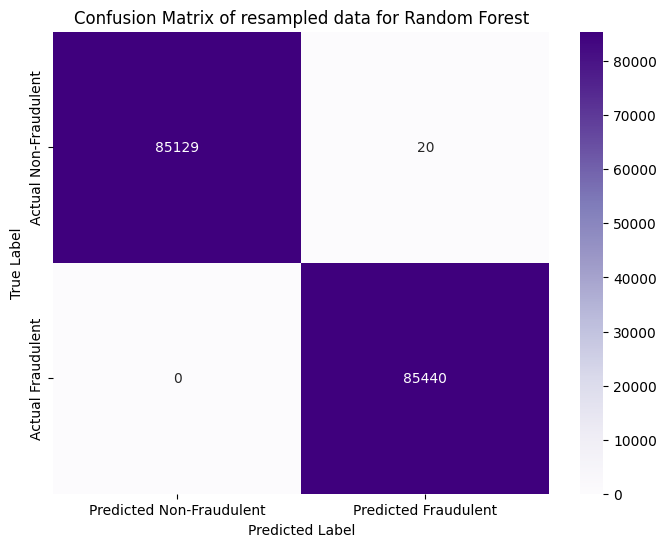

In [ ]:
# Confusion Matrix
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_rf_resampled, annot=True , fmt='d' , cmap="Purples",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix of resampled data for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



# **Takeaways from this confusion matrix**


*Non-Fraudulent transactions:*

Correctly predicted as non-fraudulent(True Negative) 85128 transactions.
    
Incorrectly predicted as fraudulent(False Positive) 21 transactions.

*Fraudulent Transactions:*

Incorrectly predicted as non-fraudulent(False Negative) : 0 transactions

Correctly predicted as fraudulent(True Positive) : 85440 transactions

# *Conclusions*

The model correctly identified 85440 fraudulent transactions.

Incorrectly identified 0 transactions as non-fraudulent.

It correctly identified 85130 non-fraudulent transactions.

It incorrectly identified only 19 non-fraudulent transactions as fraudulent.



In [ ]:
print("Evaluation of Resampled Random Forest Model: ")

print("Accuracy:",round(accuracy_score(test_Y,predictions_resampled),4))
print("Precision:",round(precision_score(test_Y,predictions_resampled),4))
print("recall_score:",round(recall_score(test_Y,predictions_resampled),4))
print("F1-Score:",round(f1_score(test_Y,predictions_resampled),4))

Evaluation of Resampled Random Forest Model: 
Accuracy: 0.9999
Precision: 0.9998
recall_score: 1.0
F1-Score: 0.9999


We can see that our model performed much better than the previous Random Forest classifier without oversampling, we have applied the techniques to address the class imbalance issues and achieved an accuracy of more than 99%.